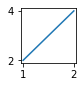

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(1,1))
plt.plot([1,2],[2,4])
plt.show()

In [2]:
# Now import everything else
import numpy as np
import pylab
import time
import scipy
from scipy.interpolate import interp2d

# Camera Object

In [3]:
# Make a camera object
#from CamFLIR import CamFLIR
from CamHamThread import CamHamThread
cam=CamHamThread(exposure=0.5,SensitivityGain=4,CCDMode="NormalCCD")



In [4]:
#This is how you take a photo
img=cam.Snap(1) 


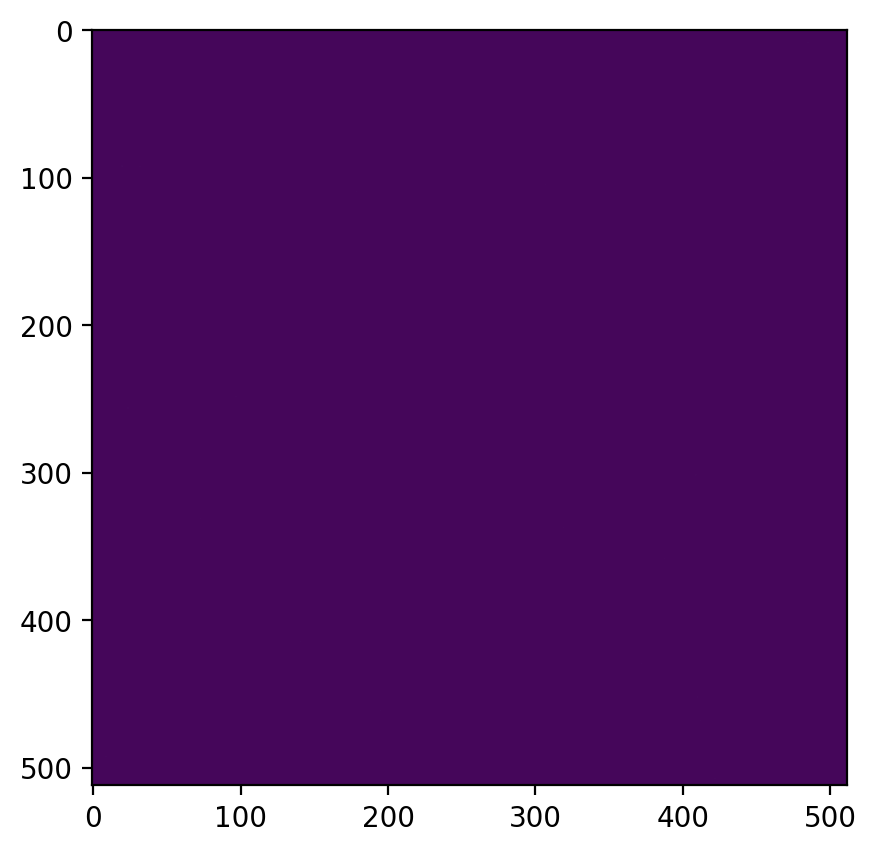

In [5]:
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img[0],clim=(200,100000))

In [32]:
folder='/Users/ohs2758/Documents/'
plt.savefig('lala'+ 'image__'+ str(1)) 

<Figure size 432x288 with 0 Axes>

# Stage Object

In [ ]:
#Initiate a stage object
from Stage import Stage
stg=Stage()

In [ ]:
print("Stage at ",stg.X,stg.Y,stg.Z)

In [ ]:
#Move in X and into focus
#time.sleep(5)
stg.MoveToX(-3)
stg.MoveToY(1)
#stg.MoveToZ(3.529)

#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

In [ ]:
FocalPoints=[]
FocalPoints.append([0,0,3.4656])
FocalPoints.append([1,1,3.4800])
FocalPoints.append([1,0,3.4707])
FocalPoints.append([0,1,3.4754])
FocalPoints=np.array(FocalPoints)

stg.DefineFocalPlane(FocalPoints)

In [ ]:
def DefineFocalPlane(FocalPoints):
    FocalPlane=interp2d(FocalPoints[:,0],FocalPoints[:,1],FocalPoints[:,2])
    
def FocusAt(x,y):
    stg.MoveToX(x)
    stg.MoveToY(y)
    stg.MoveToZ(FocalPlane(x,y)[0])
    

def BigImageSweep(xmin,xmax,xstep,ymin,ymax,ystep):
    xs= np.arange(xmin,xmax,xstep)
    ys= np.arange(ymin,ymax,ystep)
    fig=plt.figure(figsize=(8,8),dpi=150)
    gs = fig.add_gridspec(len(xs), len(ys), hspace=0, wspace=0)
    axes= gs.subplots(sharex='col', sharey='row')
    pics={}
    for ix in range(0,len(xs)):
        for iy in range(0,len(ys)):
            x=xs[ix]
            y=ys[iy]
            stg.FocusAt(x,y)
            time.sleep(0.5)
            pics[x,y]=cam.Snap(1)[0]
            axes[ix][iy].imshow(pics[x,y])
            #plt.figure(figsize=(4,4),dpi=100)
            #plt.imshow(pics[x,y])
    return pics

In [ ]:
pics=BigImageSweep(0,0.1,0.02,0,0.1,0.02)

In [ ]:
for k in pics.keys():
    plt.figure(figsize=(4,4),dpi=100)
    plt.imshow(pics[k])

In [ ]:
pics

In [ ]:
#time.sleep(1)
stg.MoveToX(-6.3)
stg.MoveToY(-0.6)
stg.MoveToZ(3.4565)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

# Scan Example

In [ ]:
zVal = []
def MakeImageSweep(Zs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        pics.append(cam.Snap(1)[0])
        print(Zs[i])
        zVal.append(Zs[i])
        time.sleep(1)

    return pics

In [ ]:
Zs=np.linspace(3.45,3.46,50)
pics=MakeImageSweep(Zs,showthem=True)

In [ ]:
print(zVal)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

arrayMax = []
arrayTenthLargestVal=[]
arrayHundrethLargestVal =[]
numarray=[]
num =0


for pic in pics:
    
    # create the histogram
    num+=1
    numarray.append(num)

    imarray = np.asarray(pic)
    imarray=imarray.flatten()
    plt.figure()

    maxValue=np.max(imarray)
    arrayMax.append(maxValue)
    minValue=np.min(imarray)
    xmax=maxValue
    xmin=minValue
    tenthLargestVal=np.partition(imarray, -10)[-10]
    optimize = tenthLargestVal
    arrayTenthLargestVal.append(optimize)
    hundrethLargestVal = np.partition(imarray, -100)[-100]
    arrayHundrethLargestVal.append(hundrethLargestVal)
    thousandthLargestVal = np.partition(imarray, -1000)[-1000]
    tenthousandthLargestVal = np.partition(imarray, -10000)[-10000]
    plt.axvline(x=xmax, ymin=0, ymax=1, color ='red', label="max")
    plt.axvline(x=xmin, ymin=0, ymax=1, color='blue',label = "min")
    plt.axvline(x=tenthLargestVal, ymin=0, ymax=1, color='green', label = "tenthLargestVal")
    plt.axvline(x=hundrethLargestVal, ymin=0, ymax=1, color='yellow', label = "hundrethLargestVal")
    plt.axvline(x=thousandthLargestVal, ymin=0, ymax=1, color='orange', Label = "thousandthLargestVal")
    plt.axvline(x=tenthousandthLargestVal, ymin=0, ymax=1, color='pink', label = "tenthousandthLargestVal")
    plt.legend(loc="upper left")

    (n, bins, patches) = plt.hist(imarray, bins=10**np.logspace(np.log10(.1),np.log10(5.0), 256), histtype='stepfilled')
    plt.yscale('symlog')
    plt.xscale('log')
    plt.title("Grayscale Histogram")
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    plt.xlim(1000,100000)
    plt.ylim(1, 1000000)
    plt.savefig(r"C:\Users\ohs2758\Documents\plots"+ str(num))
    plt.close()

plt.figure()
plt.plot(numarray,arrayMax, color ='red',label="max")
plt.plot(numarray,arrayTenthLargestVal, color ='green',label = "tenthLargestVal")
plt.plot(numarray,arrayHundrethLargestVal, color ='yellow',label = "hundrethLargestVal")
plt.title("Brightness per Image")
plt.xlabel("Image number")
plt.ylabel("Brightness Value")
plt.legend(loc="upper left")
plt.show()

MaxTenthBrightestVal=np.max(arrayTenthLargestVal)
indexTenthVal = arrayTenthLargestVal.index(MaxTenthBrightestVal)

print(MaxTenthBrightestVal)
print(arrayTenthLargestVal)
print(indexTenthVal)


In [ ]:

stg.MoveToZ(zVal[indexTenthVal])

In [ ]:
#This is how you take a photo
img=cam.Snap(1) 
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img[0],clim=(200,100000))

In [ ]:
for i in range(0,len(pics)):
    #Optionally display them
    plt.figure(figsize=(5,5))
    plt.imshow(pics[i])
    plt.title(Zs[i])
    plt.clim(2000,5000)

In [ ]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)